In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nm
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = '<style>svg{width:70% !important;height:70% !important;}</style>'
HTML(style)

In [4]:
vibration = pd.read_csv('../data/Vodnik_VIBR.csv', index_col=0, sep=';')

In [5]:
vibration.head()

,Значение,Состояние значения
data_time,,
14.04.2022 17:42,"7,274764787",норма
14.04.2022 17:42,"7,274764787",норма
14.04.2022 17:43,"7,27590385",норма
14.04.2022 17:43,"7,27590385",норма
14.04.2022 17:43,"7,27590385",норма


In [6]:
frequency = pd.read_csv('../data/Vodnik_frequency.csv', index_col=0, sep=';')

In [7]:
# Переименовать столбец
frequency = frequency.rename(columns= {'Значение': 'values_frequency', 'Состояние значения': 'values_state_frequency'})
frequency.head(100)
frequency.shape

(45090, 2)

In [8]:
# Переименовать столбец
vibration = vibration.rename(columns= {'Значение': 'values_vibration', 'Состояние значения': 'values_state_vibration'})
vibration.head(100)
vibration.shape

(47787, 2)

In [9]:
data = pd.merge(frequency, vibration, on=["data_time"],how="outer", validate="many_to_many").drop_duplicates()
data.shape

(45202, 4)

In [10]:
data.head(100000)
# Проверка даты

,values_frequency,values_state_frequency,values_vibration,values_state_vibration
data_time,,,,
14.04.2022 17:42,0,норма,"7,274764787",норма
14.04.2022 17:43,0,норма,"7,27590385",норма
14.04.2022 17:43,0,норма,"7,276366891",норма
14.04.2022 17:44,"14259,75952",аварийно высокое,"7,261320221",норма
14.04.2022 17:44,"14259,75952",аварийно высокое,"7,276366891",норма
...,...,...,...,...
03.06.2022 10:29,NaN,NaN,"24,30559369",норма
03.06.2022 10:31,NaN,NaN,"24,85656221",норма
03.06.2022 11:25,NaN,NaN,"13,07223977",норма


In [11]:
# Все значения nan = 0
data = data.fillna('0')
data.head(100000)

,values_frequency,values_state_frequency,values_vibration,values_state_vibration
data_time,,,,
14.04.2022 17:42,0,норма,"7,274764787",норма
14.04.2022 17:43,0,норма,"7,27590385",норма
14.04.2022 17:43,0,норма,"7,276366891",норма
14.04.2022 17:44,"14259,75952",аварийно высокое,"7,261320221",норма
14.04.2022 17:44,"14259,75952",аварийно высокое,"7,276366891",норма
...,...,...,...,...
03.06.2022 10:29,0,0,"24,30559369",норма
03.06.2022 10:31,0,0,"24,85656221",норма
03.06.2022 11:25,0,0,"13,07223977",норма


In [12]:
#X = pd.get_dummies(X) # строковые переменные преобразуются в числовые автоматически + два столбца
for i in range(data.shape[0]):
    data.values_vibration[i] = float(data.values_vibration[i].replace(',', '.'))
    data.values_frequency[i] = float(data.values_frequency[i].replace(',', '.'))

In [13]:
# битые данные, но предположительно нормальные
data.loc[(data.values_state_frequency == '0'), 'values_state_frequency'] = 'норма'
data.loc[(data.values_vibration == '0'), 'values_vibration'] = 'норма'
data.head(100000)

,values_frequency,values_state_frequency,values_vibration,values_state_vibration
data_time,,,,
14.04.2022 17:42,0.0,норма,7.274765,норма
14.04.2022 17:43,0.0,норма,7.275904,норма
14.04.2022 17:43,0.0,норма,7.276367,норма
14.04.2022 17:44,14259.75952,аварийно высокое,7.26132,норма
14.04.2022 17:44,14259.75952,аварийно высокое,7.276367,норма
...,...,...,...,...
03.06.2022 10:29,0.0,норма,24.305594,норма
03.06.2022 10:31,0.0,норма,24.856562,норма
03.06.2022 11:25,0.0,норма,13.07224,норма


In [14]:
# уберем выбросы
data.loc[(data.values_vibration > 50), 'values_vibration'] = 0
# немного сэмитируем данные
data.loc[(data.values_vibration > 20), 'values_vibration'] = 0

<AxesSubplot:xlabel='data_time'>

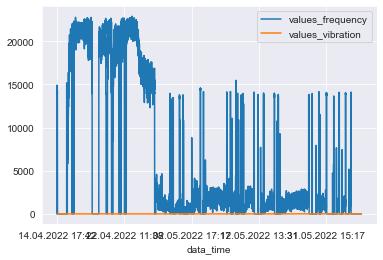

In [15]:
data.plot(kind='line')   ############################

In [16]:
# Создадим дерево решений и обучим его с одним классификатором
clf_test = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10) # Дерево решений
X = data[['values_frequency', 'values_vibration']] # данные для обучения
#y = data[['values_state_frequency', 'values_state_vibration']] # Данные ответ
y = data[['values_state_frequency']] # Данные ответ

In [17]:
clf_test.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

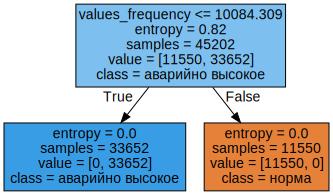

In [18]:
graph = Source(tree.export_graphviz(clf_test, out_file=None
                                    , feature_names=list(X), class_names=['норма', 'аварийно высокое']
                                    , filled=True))
display(SVG(graph.pipe(format='svg')))   # Переобученная модель

In [19]:
# Проверим работу классификатора на исходных данных
clf_test.score(X, y)

1.0

In [20]:
clf_test.predict([[14259, 7]])

/Users/nikolaibabuhin/PycharmProjects/sirius_data/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['аварийно высокое'], dtype=object)

In [21]:
###########################################################

from sklearn.model_selection import cross_val_score

# отбираем данные для обучения
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
# Создадим дерево решений и обучим его на нашей выборке
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10) # Дерево решений
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [23]:
clf.score(X_train, y_train)

1.0

In [24]:
clf.score(X_test, y_test)

1.0

In [25]:
# все точки теперь используются и для теста и для обучения
# cv=10 деление модели обучает модель на 9/10 части и проверяет ее на 1/10 части
cross_val_score(clf, X_train, y_train, cv=3).mean()

1.0

In [26]:
# насколько меняем глубину
max_depth_values = range(1,100)

In [27]:
# создаем дата фрейм для загрузки туда результатов обучения
score_data = pd.DataFrame()

In [28]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score =  clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=10).mean() # все точки теперь используются и для теста и для обучения

    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    score_data = score_data.append(temp_score_data)

/var/folders/8r/vf7kv7hd5f3bmfzvcl6nfqgm0000gq/T/ipykernel_23374/1673897241.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append(temp_score_data)
/var/folders/8r/vf7kv7hd5f3bmfzvcl6nfqgm0000gq/T/ipykernel_23374/1673897241.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append(temp_score_data)
/var/folders/8r/vf7kv7hd5f3bmfzvcl6nfqgm0000gq/T/ipykernel_23374/1673897241.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append(temp_score_data)
/var/folders/8r/vf7kv7hd5f3bmfzvcl6nfqgm0000gq/T/ipykernel_23374/1673897241.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

In [29]:
score_data.head(10)

,max_depth,train_score,test_score,cross_val_score
0,1,1.0,1.0,1.0
0,2,1.0,1.0,1.0
0,3,1.0,1.0,1.0
0,4,1.0,1.0,1.0
0,5,1.0,1.0,1.0
0,6,1.0,1.0,1.0
0,7,1.0,1.0,1.0
0,8,1.0,1.0,1.0
0,9,1.0,1.0,1.0
0,10,1.0,1.0,1.0


In [30]:
score_data_long = pd.melt(score_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                                  var_name='set_type', value_name='score')

In [31]:
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,1.0
1,2,train_score,1.0
2,3,train_score,1.0
3,4,train_score,1.0
4,5,train_score,1.0


<AxesSubplot:xlabel='max_depth', ylabel='score'>

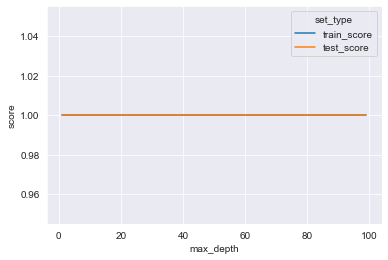

In [32]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=score_data_long)

In [33]:
# Обучение
clf = tree.DecisionTreeClassifier()

In [34]:
parametrs = {'criterion':['gini', 'entropy'], 'max_depth':range(1, 30)}

In [35]:
# GridSearchCV – это очень мощный инструмент для автоматического подбирания параметров для моделей машинного обучения.

from sklearn.model_selection import GridSearchCV

grid_search_cv_clf  = GridSearchCV(clf, parametrs, cv=5) ## изучить

In [36]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [37]:
# Посмотрим подобранные параметры
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [38]:
best_cfl = grid_search_cv_clf.best_estimator_

In [39]:
# Протестируем обученную модель
best_cfl.score(X_test, y_test)

1.0

In [40]:
best_cfl.predict([[14259, 7]])

/Users/nikolaibabuhin/PycharmProjects/sirius_data/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['аварийно высокое'], dtype=object)

<AxesSubplot:xlabel='max_depth', ylabel='score'>

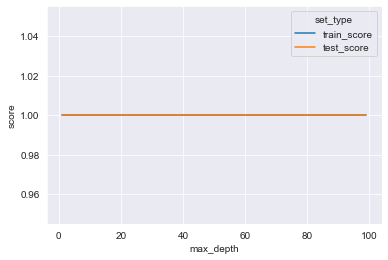

In [41]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=score_data_long)

In [42]:
# Анализ метрик проверка качества системы
from sklearn.metrics import precision_score, recall_score

In [43]:
y_pred =  best_cfl.predict(X_test, )

In [44]:
#precision_score(y_test, y_pred) # Precig
precision_score(y_test, y_pred, average="binary", pos_label="аварийно высокое")

1.0

In [45]:
recall_score(y_test, y_pred, average="binary", pos_label="аварийно высокое")# Recol

1.0

In [46]:
у_predicted_prob = best_cfl.predict_proba(X_test)

In [47]:
у_predicted_prob

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

<AxesSubplot:>

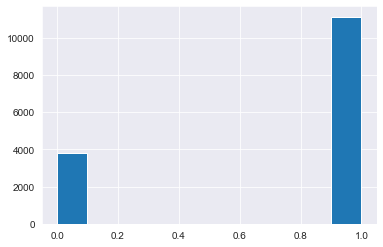

In [48]:
pd.Series(у_predicted_prob[0:, 1]).hist()

In [49]:
# Проведем бинаризацию данных
mapping = {'аварийно высокое':1,'норма': 0}
y_test['values_state_frequency'] = y_test['values_state_frequency'].map(mapping)
y_test.head()

,values_state_frequency
data_time,
31.05.2022 13:36,0
15.04.2022 03:27,0
01.06.2022 22:50,0
16.04.2022 08:24,1
26.04.2022 13:23,0


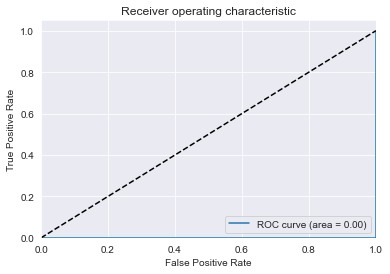

In [50]:
# Построение ROC кривой https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html?from_mobile_app=true&mobile_internal_deeplink=true

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Чем хуже классификатор тем ближе кривая к прямой далее что важнее ROC AOC 90 % что все огонь
fpr, tpr, thresholds = roc_curve(y_test, у_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")